In [1]:
import os
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\heera\Desktop\Dissertation\Data Physionet\traindata\merged.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0.1
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668,1
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338,1
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496,1
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556,1
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410,1


In [4]:
df = df.rename(columns={"0.1": "labels"})

In [5]:
df["labels"].value_counts()

0    2575
1     665
Name: labels, dtype: int64

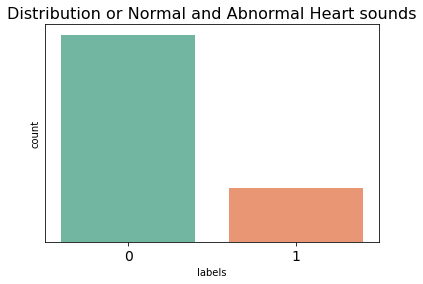

In [6]:
import seaborn as sns
plt.title("Distribution or Normal and Abnormal Heart sounds",fontsize= 16)
plt.xticks(fontsize=14,rotation=0)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
plt.yticks([])
sns.countplot(x='labels',data=df,palette="Set2")
plt.show()
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.0f}'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')


# Split the Dataset and balance the y variable

In [7]:
### Split the dataset into independent and dependent dataset


In [8]:
X = df.iloc[:,0:40]
# y = df["class"]

In [9]:
X.shape

(3240, 40)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-577.74457,116.68117,82.454210,40.931873,7.485605,-7.887007,-4.491601,10.008358,24.508472,30.438593,...,3.970105,5.994569,5.839570,3.671601,0.848826,-1.004319,-1.004396,0.530715,2.398161,3.331668
1,-628.81630,136.51126,100.357864,56.209590,19.551243,0.428206,-0.259094,10.158183,21.104572,24.655876,...,2.601242,3.507886,2.841200,1.227278,-0.146953,-0.405241,0.449801,1.629177,2.186590,1.692338
2,-601.18340,77.22223,61.623146,42.221630,25.632828,16.337782,15.002048,18.738730,23.003593,24.039800,...,2.034146,2.748103,2.922751,2.290715,1.166961,0.225971,0.042497,0.699116,1.713670,2.332496
3,-562.58900,88.77356,71.557740,49.522438,29.541950,16.664858,12.350879,14.427670,18.631382,20.879950,...,0.486486,0.984788,1.662023,2.113323,2.125078,1.752352,1.235468,0.835051,0.692907,0.788556
4,-489.47345,65.72582,57.030285,45.383488,33.820340,24.795256,19.436210,17.373821,17.174334,17.152473,...,2.368080,2.122123,2.094586,2.164926,2.183312,2.057845,1.794090,1.474256,1.199110,1.032410


In [11]:
y = df[["labels"]]

In [12]:
y.shape

(3240, 1)

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X_sm, y_sm = sm.fit_resample(X, y)

In [14]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=0)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4120, 40)
(1030, 40)
(4120, 1)
(1030, 1)


In [16]:
!pip install torch

In [17]:
!pip install torchvision

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


In [19]:
#Code referred from : https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

In [21]:
# pytorch mlp for binary classification with 5 fold cross validation
import torch
import torchvision
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import KFold

# # dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
#        label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
  
    def get_splits(self, n_test=0.30):
    # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs,10 )
#         kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
#         kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
#         xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat


# prepare the data
path = 'C:/Users/heera/Desktop/Dissertation/Data Physionet/traindata/merged.csv'
dataset = CSVDataset(path)

kfold = KFold(n_splits =5, shuffle =True, random_state= 1)

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    train_set = torch.utils.data.dataset.Subset(dataset,train_ids)
    test_set = torch.utils.data.dataset.Subset(dataset,test_ids)

    train_dl = DataLoader(train_set, batch_size=50)
    test_dl = DataLoader(test_set, batch_size=50)

    print(len(train_dl.dataset), len(test_dl.dataset))
    # define the network
    model = MLP(40)
    # train the model
    train_model(train_dl, model)
    # evaluate the model
    acc = evaluate_model(test_dl, model)
    train_acc = evaluate_model(train_dl, model)
    print('Train Accuracy: %.3f' % train_acc)
    print('Test Accuracy: %.3f' % acc)
  

2592 649
Train Accuracy: 0.792
Test Accuracy: 0.804
2593 648
Train Accuracy: 0.794
Test Accuracy: 0.798
2593 648
Train Accuracy: 0.212
Test Accuracy: 0.176
2593 648
Train Accuracy: 0.794
Test Accuracy: 0.799
2593 648
Train Accuracy: 0.194
Test Accuracy: 0.252
